In [37]:
# Import library
import os
import shutil
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Upload file kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mc006d5y2205","key":"4ccd349510c26b6ba5816d01a89ca342"}'}

In [3]:
# Membuat folder ~/.kaggle
kaggle_dir = os.path.expanduser("~/.kaggle")
os.makedirs(kaggle_dir, exist_ok=True)

# Memindahkan file yang diupload
shutil.move("kaggle.json", os.path.join(kaggle_dir, "kaggle.json"))

# Mengubah permission
os.chmod(os.path.join(kaggle_dir, "kaggle.json"), 0o600)

In [4]:
# Download dataset dari kaggle
!kaggle datasets download -d parasharmanas/movie-recommendation-system

Dataset URL: https://www.kaggle.com/datasets/parasharmanas/movie-recommendation-system
License(s): ODbL-1.0
 75% 123M/165M [00:00<00:00, 1.29GB/s]
100% 165M/165M [00:00<00:00, 1.09GB/s]


In [5]:
# Unzip file yang telah didownload
!unzip -o movie-recommendation-system.zip

Archive:  movie-recommendation-system.zip
  inflating: movies.csv              
  inflating: ratings.csv             


In [6]:
# Memuat dataset ke dalam bentuk DataFrame
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [7]:
# Menampilkan lima baris teratas pada DataFrame movies
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
# Menampilkan lima baris teratas pada DataFrame ratings
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [9]:
# Melihat gambaran awal tentang dataset
print('Jumlah data film yang tersedia dalam dataset adalah', len(movies.movieId.unique()))
print('Jumlah data kombinasi genres yang tersedia dalam dataset adalah', len(movies.genres.unique()))
print('Jumlah data user yang memberikan rating dalam dataset adalah', len(ratings.userId.unique()))
print('Jumlah data film yang telah diberikan rating dalam dataset adalah', len(ratings.movieId.unique()))
print('Jumlah pilihan rating yang dapat diberikan adalah', len(ratings.rating.unique()))

Jumlah data film yang tersedia dalam dataset adalah 62423
Jumlah data kombinasi genres yang tersedia dalam dataset adalah 1639
Jumlah data user yang memberikan rating dalam dataset adalah 162541
Jumlah data film yang telah diberikan rating dalam dataset adalah 59047
Jumlah pilihan rating yang dapat diberikan adalah 10


In [10]:
# Menampilkan informasi dasar pada DataFrame movies
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


DataFrame movies memiliki total 62,423 baris dengan 3 kolom yang terdiri atas:
- movieId -> bertipe integer
- title -> bertipe object
- genres -> bertipe object

In [11]:
# Melihat jumlah nilai null pada masing-masing kolom untuk DataFrame movies
movies.isnull().sum()

,0
movieId,0
title,0
genres,0


Terlihat bahwa setiap entri pada ketiga kolom DataFrame movies tidak ada yang bernilai null

In [12]:
# Mengecek apakah ada data duplikat pada DataFrame movies
movies_duplicate_count = movies.duplicated().sum()
print('Jumlah data duplikat pada DataFrame movies:', movies_duplicate_count)

Jumlah data duplikat pada DataFrame movies: 0


Terlihat bahwa DataFrame movies tidak mengandung data duplikat

In [13]:
# Menampilkan informasi dasar pada DataFrame ratings
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


DataFrame ratings memiliki total 25,000,095 baris dengan 4 kolom yang terdiri atas:
- userId -> bertipe integer
- movieId -> bertipe integer
- rating -> bertipe float
- timestamp -> bertipe integer

In [14]:
# Melihat jumlah nilai null pada masing-masing kolom untuk DataFrame ratings
ratings.isna().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0


Terlihat bahwa setiap entri pada keempat kolom DataFrame ratings tidak ada yang bernilai null

In [15]:
# Mengecek apakah ada data duplikat pada DataFrame ratings
ratings_duplicate_count = ratings.duplicated().sum()
print('Jumlah data duplikat pada DataFrame ratings:', ratings_duplicate_count)

Jumlah data duplikat pada DataFrame ratings: 0


Terlihat bahwa DataFrame ratings tidak mengandung data duplikat

In [16]:
# Menampilkan pilihan rating
ratings_list = sorted(float(r) for r in ratings.rating.unique()) # menyortir dari terkecil ke terbesar
print('Pilihan rating yang dapat diberikan:', ratings_list)

Pilihan rating yang dapat diberikan: [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


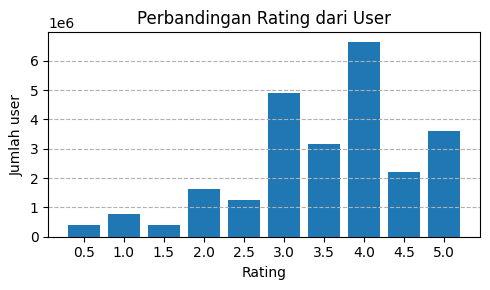

In [19]:
# Menghitung berapa kali sebuah rating dipilih
rating_counts = ratings['rating'].value_counts().sort_index()

# Menampilkan hasil dalam diagram batang
plt.figure(figsize=(5, 3))
plt.bar(rating_counts.index, rating_counts.values, width=0.4)
plt.xlabel('Rating')
plt.ylabel('Jumlah user')
plt.title('Perbandingan Rating dari User')
plt.xticks(rating_counts.index)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Terlihat bahwa lebih dari 6,000,000 user memberikan rating 4.0 sehingga rating ini adalah yang paling banyak diberi. Sementara itu, terdapat kurang dari 500,000 user yang memberikan rating 0.5 sehingga rating ini adalah jumlah yang paling sedikit diberi

In [20]:
# Melihat distribusi rating
ratings['rating'].describe()

,rating
count,2.500010e+07
mean,3.533854e+00
std,1.060744e+00
min,5.000000e-01
25%,3.000000e+00
50%,3.500000e+00
75%,4.000000e+00
max,5.000000e+00


Didapati rata-rata rating yang diberikan yaitu 3.53 dengan standar deviasi 1.06. Rating yang diberikan memiliki nilai terkecil yaitu 0.5 dan nilai terbesar yaitu 5.0

In [21]:
# Menggabungkan DataFrame movies dan ratings
movie_rating = pd.merge(movies, ratings, on='movieId', how='right')

In [23]:
# Menampilkan DataFrame gabungan
movie_rating.head()

,movieId,title,genres,userId,rating,timestamp
0,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1,5.0,1147880044
1,306,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama,1,3.5,1147868817
2,307,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama,1,5.0,1147868828
3,665,Underground (1995),Comedy|Drama|War,1,5.0,1147878820
4,899,Singin' in the Rain (1952),Comedy|Musical|Romance,1,3.5,1147868510


In [24]:
# Mengecek jumlah nilai null pada DataFrame gabungan
movie_rating.isna().sum()

,0
movieId,0
title,0
genres,0
userId,0
rating,0
timestamp,0


In [ ]:
# Mengecek apakah ada data duplikat pada DataFrame gabungan
duplicate_count = movie_rating.duplicated().sum()
print('Jumlah data duplikat pada DataFrame gabungan:', duplicate_count)

Jumlah data duplikat pada DataFrame gabungan: 0


In [26]:
# Mengurutkan DataFrame berdasarkan movieId
movie_rating.sort_values('movieId', ascending=True)

,movieId,title,genres,userId,rating,timestamp
19265908,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,125003,5.0,949960354
4129901,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27176,4.5,1339791723
13038927,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,84438,3.5,1165830936
19529901,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,126808,1.0,949626848
13038902,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,84437,5.0,963172235
...,...,...,...,...,...,...
18457961,209157,We (2018),Drama,119571,1.5,1574280748
17864443,209159,Window of the Soul (2001),Documentary,115835,3.0,1574280985
1036618,209163,Bad Poems (2018),Comedy|Drama,6964,4.5,1574284913
18457962,209169,A Girl Thing (2001),(no genres listed),119571,3.0,1574291826


In [27]:
# Mengecek apakah setiap title memiliki tepat satu movieId dan genres yang sama
check = movie_rating.groupby('title')[['movieId', 'genres']].nunique()
non_unique = check[(check['movieId'] > 1) | (check['genres'] > 1)]
non_unique

,movieId,genres
title,,
9 (2009),2,2
Absolution (2015),2,2
Aladdin (1992),2,2
American Woman (2019),2,2
An Inspector Calls (2015),2,2
...,...,...
The Reunion (2011),2,2
The Void (2016),2,2
Veronica (2017),2,2


Terlihat ada 89 sampel dimana sebuah title memiliki lebih dari satu movieId dan genres yang berbeda

In [28]:
# Memilih nilai modus untuk movieId dan genres dari sebuah title yang sama
fix = (
    movie_rating.groupby('title').agg({
        'movieId': lambda x: x.mode().iloc[0],
        'genres': lambda x: x.mode().iloc[0]
    })
)

# Menyamakan movieId dan genres untuk satu title yang sama
movie_rating['movieId'] = movie_rating['title'].map(fix['movieId'])
movie_rating['genres'] = movie_rating['title'].map(fix['genres'])

In [29]:
# Memastikan sebuah title hanya memiliki satu movieId dan satu genres
check = movie_rating.groupby('title')[['movieId', 'genres']].nunique()
non_unique = check[(check['movieId'] > 1) | (check['genres'] > 1)]
if non_unique.empty:
    print("Semua title memiliki tepat satu movieId dan satu genres")
else:
    print("Ada title yang memiliki lebih dari satu movieId atau lebih dari satu genres")

Semua title memiliki tepat satu movieId dan satu genres


In [33]:
# Inisialisasi movie_rating sebagai df
df = movie_rating

In [ ]:
# Mengubah userId menjadi list tanpa nilai yang sama
user_ids = df['userId'].unique().tolist()

# Melakukan encoding userId
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}

# Melakukan proses encoding angka ke ke userId
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [ ]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = df['movieId'].unique().tolist()

# Melakukan proses encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}

# Melakukan proses encoding angka ke movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

In [36]:
# Mapping userId ke dataframe user
df['user'] = df['userId'].map(user_to_user_encoded)

# Mapping movieId ke dataframe movie
df['movie'] = df['movieId'].map(movie_to_movie_encoded)

In [39]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)

# Mendapatkan jumlah movie
num_movie = len(movie_encoded_to_movie)

# Nilai minimum rating
min_rating = min(df['rating'])

# Nilai maksimal rating
max_rating = max(df['rating'])

print('Jumlah user: {}, Jumlah film: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

Jumlah user: 162541, Jumlah film: 58958, Min Rating: 0.5, Max Rating: 5.0


In [40]:
# Mengonversi data series movieId ke dalam bentuk list
movie_id = df['movieId'].tolist()

# Mengonversi data series title ke dalam bentuk list
movie_title = df['title'].tolist()

# Mengonversi data series genres ke dalam bentuk list
movie_genres = df['genres'].tolist()

In [41]:
# Membuat dictionary untuk movie_Id, title, dan genres
movies = pd.DataFrame({
    'id': movie_id,
    'title': movie_title,
    'genres': movie_genres
})

# Menampilkan movies
movies

,id,title,genres
0,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,306,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama
2,307,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,665,Underground (1995),Comedy|Drama|War
4,899,Singin' in the Rain (1952),Comedy|Musical|Romance
...,...,...,...
25000090,50872,Ratatouille (2007),Animation|Children|Drama
25000091,55768,Bee Movie (2007),Animation|Comedy
25000092,56176,Alvin and the Chipmunks (2007),Children|Comedy
25000093,58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX


In [42]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)

# Menampilkan df
df.head()

,movieId,title,genres,userId,rating,timestamp,user,movie
15347762,104374,About Time (2013),Drama|Fantasy|Romance,99476,3.5,1467897440,99475,3024
16647840,2634,"Mummy, The (1959)",Horror,107979,4.0,994007728,107978,9642
23915192,1614,In & Out (1997),Comedy,155372,3.0,1097887531,155371,1092
10052313,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,65225,4.0,1201382275,65224,227
12214125,500,Mrs. Doubtfire (1993),Comedy|Drama,79161,5.0,1488915363,79160,964


In [43]:
# Membuat variabel x untuk mencocokkan data user dan movie menjadi satu value
x = df[['user', 'movie']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi dataset dengan proporsi 80% untuk data train dan 20% untuk data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

### Collaborative Filtering

In [44]:
# Mendefinisikan model
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movie
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movie bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)

    x = dot_user_movie + user_bias + movie_bias

    return tf.nn.sigmoid(x) # aktivasi fungsi sigmoid

In [46]:
# Inisialisasi model
model = RecommenderNet(num_users, num_movie, 50)

# Model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [47]:
# Membuat fungsi callback
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
)

In [48]:
# Memulai training model
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 2048,
    epochs = 20,
    validation_data = (x_val, y_val),
    callbacks=[early_stop]
)

Epoch 1/20
9766/9766 ━━━━━━━━━━━━━━━━━━━━ 61s 5ms/step - loss: 0.8262 - root_mean_squared_error: 0.3052 - val_loss: 1.4587 - val_root_mean_squared_error: 0.4150
Epoch 2/20
9766/9766 ━━━━━━━━━━━━━━━━━━━━ 78s 5ms/step - loss: 1.6932 - root_mean_squared_error: 0.4299 - val_loss: 2.1383 - val_root_mean_squared_error: 0.4271
Epoch 3/20
9766/9766 ━━━━━━━━━━━━━━━━━━━━ 85s 5ms/step - loss: 2.4379 - root_mean_squared_error: 0.4548 - val_loss: 2.8698 - val_root_mean_squared_error: 0.4384
Epoch 4/20
9766/9766 ━━━━━━━━━━━━━━━━━━━━ 78s 5ms/step - loss: 3.1909 - root_mean_squared_error: 0.4734 - val_loss: 3.6613 - val_root_mean_squared_error: 0.4285
Epoch 5/20
9766/9766 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - loss: 3.8190 - root_mean_squared_error: 0.4755 - val_loss: 4.3143 - val_root_mean_squared_error: 0.4263
Epoch 6/20
9766/9766 ━━━━━━━━━━━━━━━━━━━━ 59s 6ms/step - loss: 4.4817 - root_mean_squared_error: 0.4838 - val_loss: 5.2624 - val_root_mean_squared_error: 0.4198


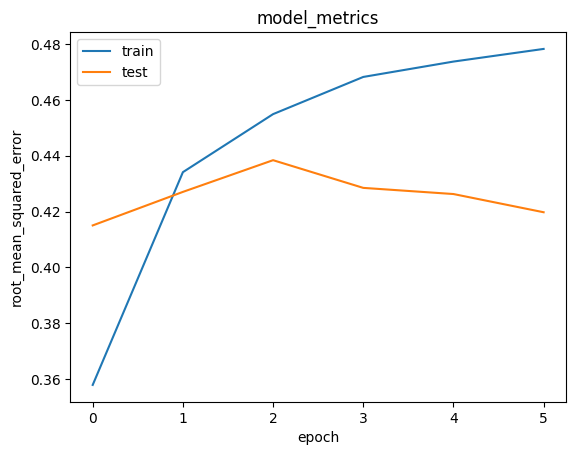

In [49]:
# Menampilkan RMSE selama pelatihan
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Proses training berjalan selama 5 epoch sebelum dihentikan. Dari proses pelatihan, diperoleh nilai error akhir sekitar 0.48 dan error pada data validasi sekitar 0.42.

In [50]:
# Mengambil sample user
user_id = df.userId.sample(1).iloc[0]
movie_watched_by_user = df[df.userId == user_id]

# Operator bitwise (~)
movie_not_watched = movies[~movies['id'].isin(movie_watched_by_user.movieId.values)]['id']
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movie_to_movie_encoded.keys()))
)

movie_not_watched = [[movie_to_movie_encoded.get(x)] for x in movie_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)

In [51]:
# Memprediksi rating
ratings = model.predict(user_movie_array).flatten()

# Mengurutkan rating untuk 10 film terbaik
sorted_indices = ratings.argsort()[::-1]
seen = set()
recommended_movie_ids = []

for idx in sorted_indices:
    movie_id = movie_encoded_to_movie.get(movie_not_watched[idx][0])
    if movie_id and movie_id not in seen:
        recommended_movie_ids.append(movie_id)
        seen.add(movie_id)
    if len(recommended_movie_ids) == 10:
        break

# Menampilkan hasil pengerjaan
print('Menunjukkan rekomendasi film untuk user: {}'.format(user_id))
print('=============================================\n')
print('Film dengan rating tertinggi dari user')
print('---------------------------------------------')

top_movie_user = (
    movie_watched_by_user.sort_values(
        by='rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

movies_df_rows = movies.drop_duplicates(subset='id')  # menghapus data duplikat (jika ada)

for row in movies_df_rows[movies_df_rows['id'].isin(top_movie_user)].itertuples():
    print(row.title, ':', row.genres)

print('\n---------------------------------------------')
print('Top 10 rekomendasi film')
print('---------------------------------------------')

# Memastikan setiap film hanya muncul satu kali dalam rekomendasi
recommended_movie = movies.drop_duplicates(subset='id')
recommended_movie = recommended_movie[recommended_movie['id'].isin(recommended_movie_ids)]

# Mencetak rekomendasi film
for row in recommended_movie.itertuples():
    print(row.title, ':', row.genres)

1840/1840 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Menunjukkan rekomendasi film untuk user: 12162

Film dengan rating tertinggi dari user
---------------------------------------------
Shawshank Redemption, The (1994) : Crime|Drama
Lion King, The (1994) : Adventure|Animation|Children|Drama|Musical|IMAX
Usual Suspects, The (1995) : Crime|Mystery|Thriller
Nightmare Before Christmas, The (1993) : Animation|Children|Fantasy|Musical
Dolores Claiborne (1995) : Drama|Thriller

---------------------------------------------
Top 10 rekomendasi film
---------------------------------------------
Star Wars: Episode IV - A New Hope (1977) : Action|Adventure|Sci-Fi
Godfather, The (1972) : Crime|Drama
Monty Python and the Holy Grail (1975) : Adventure|Comedy|Fantasy
Wallace & Gromit: The Wrong Trousers (1993) : Animation|Children|Comedy|Crime
Memento (2000) : Mystery|Thriller
Inception (2010) : Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb 